In [1]:
import pandas as pd
import numpy as np
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.stats.multitest import multipletests

In [2]:
samples = pd.read_csv('samples.txt', header=None, index_col=0).index

In [3]:
result_dir = pathlib.Path('Model')
result_list = list(result_dir.glob('*.results'))

records = {}
for path in result_list:
    name = path.name.split('.')[0]
    df = pd.read_csv(path, sep='\t', index_col=0)
    df = df.iloc[:-4, :]
    p_values = 1 - df['Coefficient_z-score'].apply(norm.cdf)
    _, padj, *_ = multipletests(p_values, method='fdr_bh')
    records[name] = padj
total_ldsc = pd.DataFrame(records)
total_ldsc.index = samples

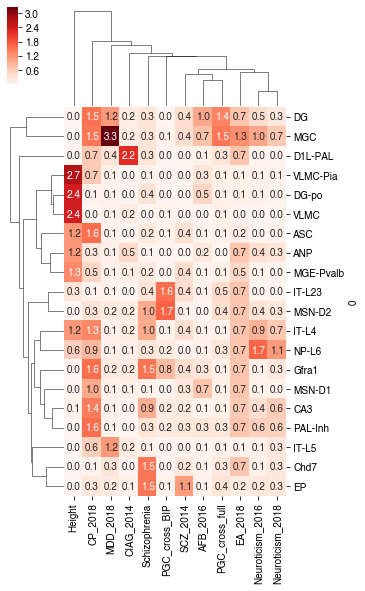

In [4]:
_useful = total_ldsc[total_ldsc < 0.1].dropna(how='all').dropna(how='all', axis=1)

sns.clustermap(-np.log10(total_ldsc.loc[_useful.index, _useful.columns]), 
               cmap='Reds', figsize=(5, 9), annot=True, fmt='.1f')

In [5]:
_useful.index

Index(['ANP', 'ASC', 'CA3', 'Chd7', 'D1L-PAL', 'DG-po', 'DG', 'EP', 'Gfra1',
       'IT-L23', 'IT-L4', 'IT-L5', 'MGC', 'MGE-Pvalb', 'MSN-D1', 'MSN-D2',
       'NP-L6', 'PAL-Inh', 'VLMC-Pia', 'VLMC'],
      dtype='object', name=0)